# Evaluation of IC and MPC


Evaluation of data acquired from control cascade with 2d nonlinear model simulation for references with settings

    if ref_type == "spiral":
        refTraj = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.0, 1.0], tscale = 0.6)
    else:
        refTraj = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.5, 1.0], tscale = 0.6)


## Imports and Loading Data


In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import tikzplotlib as tplt
from uav_params import UAVParams


In [230]:
# load model data
save_plots = True
noise = False
model_data_folder = "params"
# models_file = {"lateral", "altitude"}
models_file = {"lateral_crazyflie", "altitude_crazyflie"}
plot_label_font = 10
plot_legend_font = 10

# Load parameters of dynamics and cost function
models = []
for model_file in models_file:
    with open(model_data_folder+"/"+"ctrl_"+model_file+".pkl", 'rb') as infile:
        models.append(pickle.load(infile))

with open(model_data_folder+"/"+"ctrl_"+"attitude_crazyflie"+".pkl", 'rb') as infile:
    model_att = pickle.load(infile)
pass

# Load data from results folder
folder_results = 'results/2d_nonlin_faster/'
folder_data = 'data/'
trajectories = ['spiral', 'figure8']
controllers = ['ic','eic','mpc', 'mpcmb']
data = {}
dt_data = {}
for trajectory in trajectories:
    for controller in controllers:
        # data = [state, ref, ctrl, cost, time]
        path = folder_results+folder_data+'log_controller_'+trajectory+'_'+controller
        if noise:
            path = folder_results+folder_data+'log_controller_'+trajectory+'_noise_'+controller
        data.setdefault(trajectory, {})[controller] = np.load(
            path+'.npy', allow_pickle=True)
        path_dt = folder_results+folder_data+'time_'+trajectory+'_'+controller
        if noise:
            path_dt = folder_results+folder_data+'time'+trajectory+'_'+controller+'_noise'
        dt_data.setdefault(trajectory, {})[controller] = np.load(
            path_dt+'.npy', allow_pickle=True)

# Set time vector
Nsim = data[trajectories[0]][controllers[0]][0].shape[1]
time = np.arange(0, models[0].dt*Nsim, models[0].dt)

colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
ref_color = (0.121568627451,0.466666666667,0.705882352941)
colors_time = [(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)] # different order # MPC, MPCMB, IC, eIC

## Distribution of Invariant Sets

Picture of set given by state constraints, invariant set of low gain controller, and high gain controller.

Order: y and z-axis controller


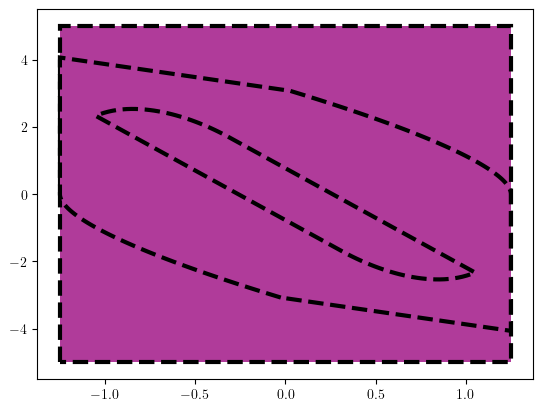

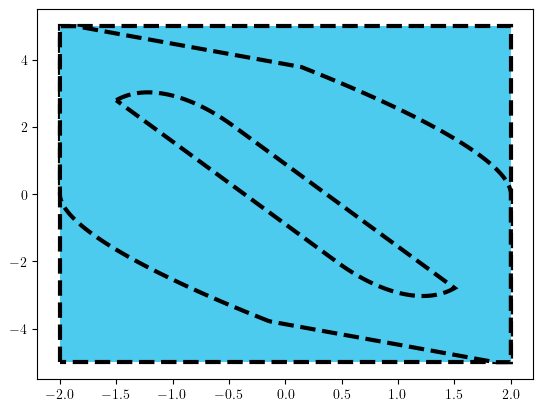

In [231]:
for model in models:
    model.plot_sets()

## Plots

### plot with reference and UAV position in y-axis for spiral/ellipse and figure8 reference trajectory

In [232]:
def save_plot(path, noise = False):
    tplt.clean_figure()
    tplt.save(path+'.tex')
    if noise:
        path = path+'_noise'
    plt.legend( fontsize=plot_legend_font)
    plt.savefig(path+'.pdf',bbox_inches="tight")
    plt.show()
    # plt.savefig(path+'.tex',format="pgf")

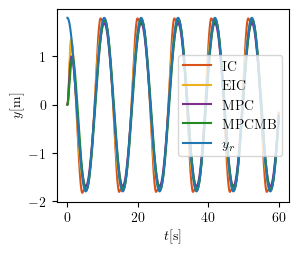

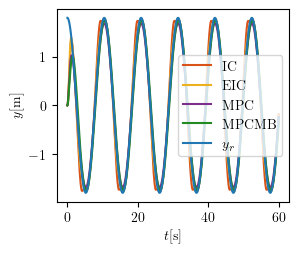

In [233]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0, :], label=r''+controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][0, :], label=r'$y_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/y_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

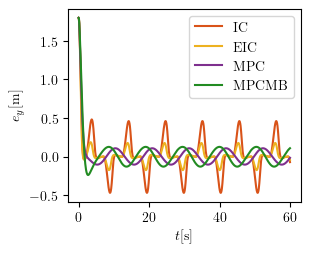

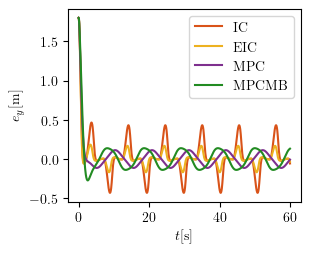

In [234]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][0, :]-data[trajectory][controller][0][0, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_y_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### plot with UAV velocity in y-axis for spiral/ellipse and figure8 reference trajectory

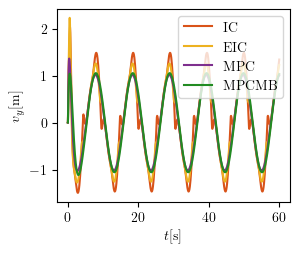

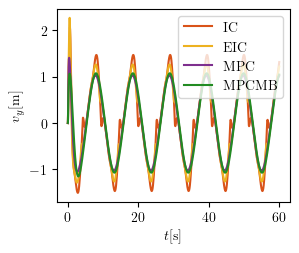

In [235]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][3, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vy_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### plot with reference and UAV position in z-axis for spiral/ellipse and figure8 reference trajectory

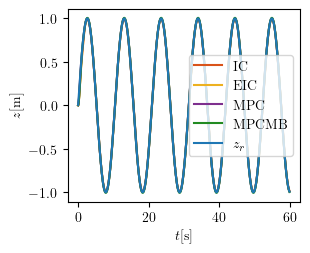

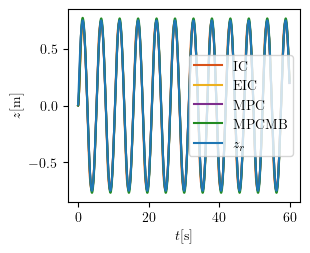

In [236]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][1, :], label=r''+controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][1, :], label=r'$z_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/z_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

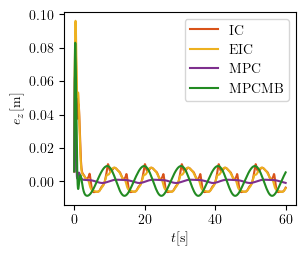

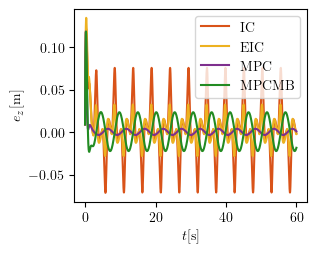

In [237]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][1, :]-data[trajectory][controller][0][1, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_z_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### plot with UAV velocity in z-axis for spiral/ellipse and figure8 reference trajectory

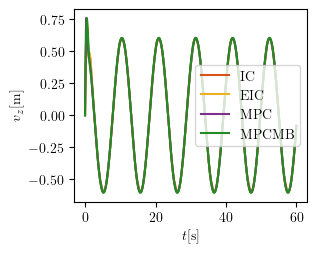

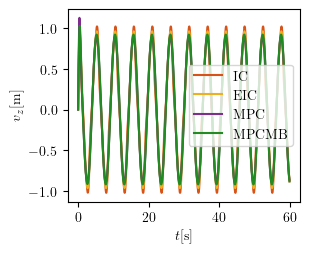

In [238]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][4, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vz_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### path of UAV for spiral/ellipse and figure8 reference trajectory

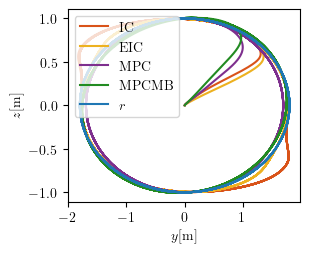

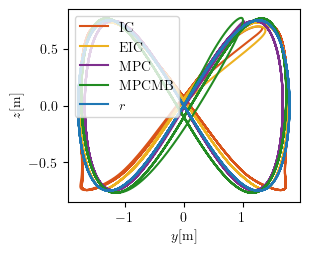

In [239]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers, colors):
        plt.plot(data[trajectory][controller][0][0, :],
             data[trajectory][controller][0][1, :], label=controller.upper(), color = color)
    plt.plot(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :], label='$r$', color = ref_color)
    plt.xlabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        tplt.clean_figure()
        tplt.save(folder_results+'plots/traj_'+trajectory+'.tex')
        if noise:
            path = folder_results+'plots/traj_'+trajectory+'_noise'
        plt.legend(loc='upper left', fontsize=plot_legend_font)
        plt.savefig(folder_results+'plots/traj_'+trajectory+'.pdf',bbox_inches="tight")
        plt.show()
        # plt.savefig(path+'.tex',format="pgf")
        # save_plot(folder_results+'plots/traj_'+trajectory)
    else:
        plt.legend(loc='upper left', fontsize=plot_legend_font)
        plt.show()


### Ouput of y-controllers, utilized by attitude control as desired angle

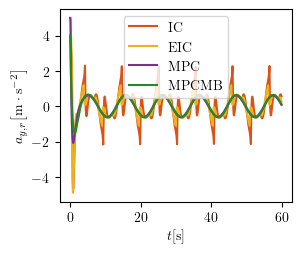

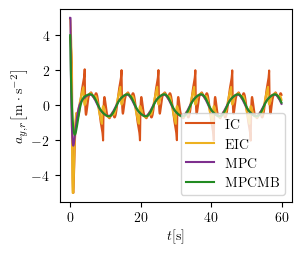

In [240]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$a_{y,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/acc_y_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### Ouput of z-controllers in form of desired collective thrust

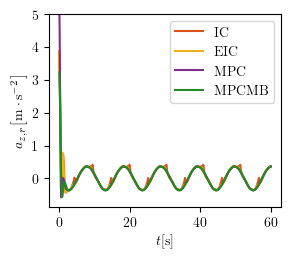

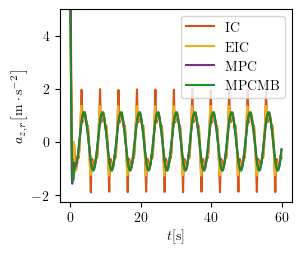

In [241]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][1, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$a_{z,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    plt.ylim(top=5)
    if save_plots:
        save_plot(folder_results+'plots/acc_z_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### Time needed to solve LP/QP

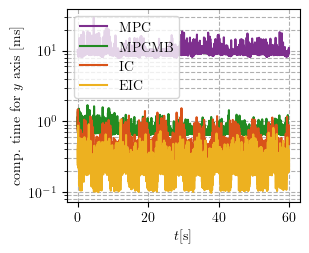

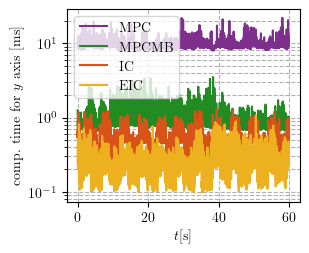

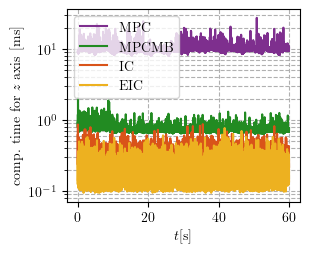

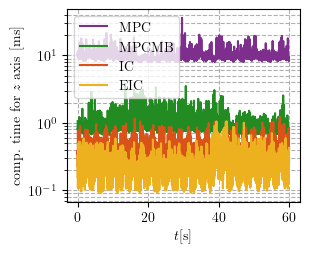

In [242]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping
names = ['y','z']
for i, name in enumerate(names):
    for trajectory in trajectories:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(3,2.5))
        for controller, color in zip(controllers_time,colors_time):
            plt.plot(time, data[trajectory][controller][4][i,:]*1e3, label=controller.upper(), color = color)
        plt.yscale('log')
        plt.grid(True, which="both", linestyle='--')
        plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
        plt.ylabel(r'comp. time for $'+name+'$ axis $\mathrm{[ms]}$', fontsize=plot_label_font)
        if save_plots:
            save_plot(folder_results+'plots/time_'+name+'_'+trajectory)
        else:
            plt.legend( fontsize=plot_legend_font)
            plt.show()

#### Sum of both periods

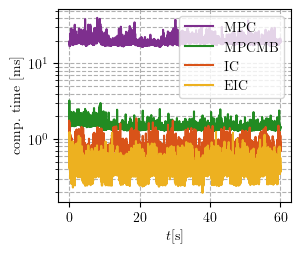

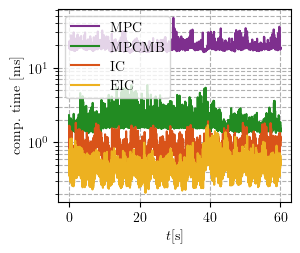

In [243]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        plt.plot(time, np.sum(data[trajectory][controller][4][:,:], 0)*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_sum_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### Time needed for control cascade to acquire control action

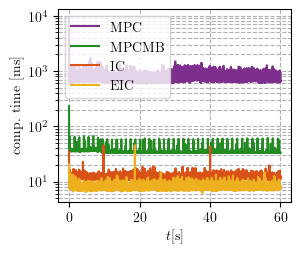

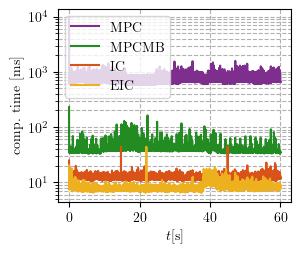

In [244]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping

names = ['y','z']
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        plt.plot(time, dt_data[trajectory][controller]*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_full_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### Interpolating coefficient

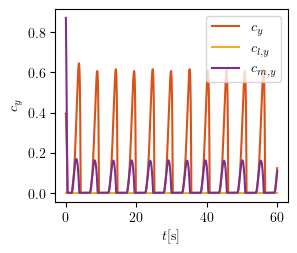

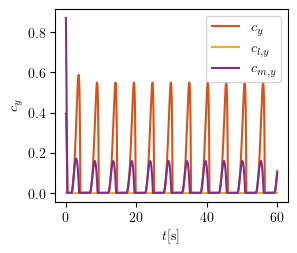

In [245]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][0, :], label=r'$c_y$', color = colors[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 0, :], label=r'$c_{l,y}$', color = colors[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 0, :], label=r'$c_{m,y}$', color = colors[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_y$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_y_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

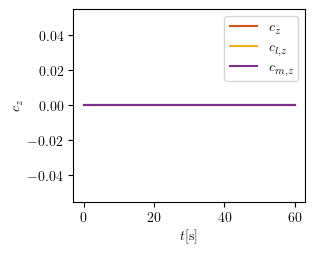

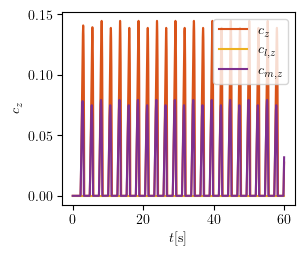

In [246]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][1, :], label=r'$c_z$', color = colors[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 1, :], label=r'$c_{l,z}$', color = colors[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 1, :], label=r'$c_{m,z}$', color = colors[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_z$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_z_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

### Value of criterion from MPCs

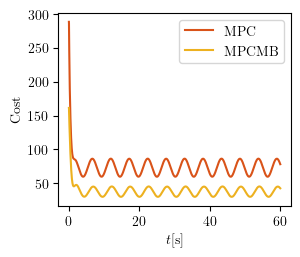

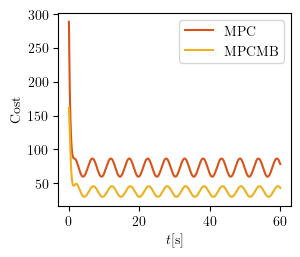

In [247]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[2]]
             [3][0, :], label='MPC', color = colors[0])
    plt.plot(time, data[trajectory][controllers[3]]
             [3][0, :], label='MPCMB', color = colors[1])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'Cost', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/mpc_cost_'+trajectory)
    else:
        plt.legend( fontsize=plot_legend_font)
        plt.show()

# Optimality, Integral Square Error, and Energy Consumption

In [248]:
nx = data[trajectory][controller][0].shape[0]
Q = np.zeros((nx,nx))
for i, model in enumerate(models):
    Q[i,i] = model.Q_h[0,0]
    Q[i+nx//2,i+nx//2] = model.Q_h[1,1]
    
nu = data[trajectory][controller][2].shape[0]
R = np.zeros((nu,nu))
for i, model in enumerate(models):
    R[i,i] = model.R_h

def eval_crit(state, control, Q, R):
    return state@Q@state.T + control@R@control.T

def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

def perc(x,l):
    return (x/l)*100-100

n = 3
nperc = 2
def eval_table(dict):
    df = pd.DataFrame.from_dict(dict)
    for trajectory in trajectories:
        df[trajectory] = df[trajectory].apply(lambda x: signif(x, n))
        df[trajectory + ' perc.'] = df[trajectory].apply(lambda x: perc(x,df.loc['mpc'].at[trajectory]))
        df[trajectory + ' perc.'] = df[trajectory + ' perc.'].apply(lambda x: np.round(x, nperc))
    return df


def multipar_dict_to_df(nested_dict):
    reformed_dict = {}
    for outerKey, innerDict in nested_dict.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                        innerKey)] = values
        return pd.DataFrame(reformed_dict)

err = {}
ise = {}
total_ise = {}
total_energy = {}
energy_cons = {}
total_time = {}
max_time = {}
mean_time = {}
std_time = {}
crit = {}
for trajectory in trajectories:
    for controller in controllers:
        err_temp = []
        crit_temp = []
        for i, model in enumerate(models):
            err_temp.append(data[trajectory][controller][1][i,:] - data[trajectory][controller][0][i,:])
        err.setdefault(trajectory, {})[controller] = np.array(err_temp)
        ise_temp = model.dt*np.sum((err[trajectory][controller][:,:]**2), 1)
        ise.setdefault(trajectory, {})[controller] =  np.hstack((ise_temp, np.sum(ise_temp)))
        energy_temp = model.dt*np.sum((data[trajectory][controller][2][:,:]**2), 1)
        energy_cons.setdefault(trajectory, {})[controller] = np.hstack((energy_temp, np.sum(energy_temp)))
        total_time_temp = np.sum(data[trajectory][controller][4],1)
        total_time.setdefault(trajectory, {})[controller] = np.hstack((total_time_temp, np.sum(total_time_temp)))
        mean_time_temp = np.mean(data[trajectory][controller][4]*1e3,1)
        mean_time.setdefault(trajectory, {})[controller] = np.hstack((mean_time_temp, np.mean(mean_time_temp)))
        std_time_temp = np.std(data[trajectory][controller][4]*1e3,1)
        std_time.setdefault(trajectory, {})[controller] = np.hstack((std_time_temp, np.std(std_time_temp)))
        max_time_temp = np.max(data[trajectory][controller][4]*1e3,1)
        max_time.setdefault(trajectory, {})[controller] = np.hstack((max_time_temp, np.max(max_time_temp)))
        total_ise.setdefault(trajectory, {})[controller] =  np.sum(ise_temp)
        total_energy.setdefault(trajectory, {})[controller] =  np.sum(energy_temp)
        crit.setdefault(trajectory, {})[controller] = np.sum(np.fromiter((eval_crit(data[trajectory][controller][1][:,k]-data[trajectory][controller][0][:,k], data[trajectory][controller][2][:,k], Q, R) for k in range(Nsim)), float))
    

### Criterion of optimality

Angle and angular rate in state vector are not reflected in criterion value as well as the torque, because they are manipulated by attitude controller.

In [249]:
df_crit = eval_table(crit)
df_crit[trajectories] = df_crit[trajectories].astype(int)
df_crit

,spiral,figure8,spiral perc.,figure8 perc.
ic,28700,25800,107.97,84.29
eic,12400,12300,-10.14,-12.14
mpc,13800,14000,0.00,0.00
mpcmb,17000,17900,23.19,27.86


### ISE

for each controller and sum

In [250]:
df_ise = eval_table(ise)
df_total_ise = eval_table(total_ise)
df_ise

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[4.31, 0.00662, 4.32]","[3.79, 0.0699, 3.86]","[111.27, 438.21, 111.76]","[87.62, 1419.57, 91.09]"
eic,"[1.79, 0.0078, 1.8]","[1.71, 0.0226, 1.73]","[-12.25, 534.15, -11.76]","[-15.35, 391.3, -14.36]"
mpc,"[2.04, 0.00123, 2.04]","[2.02, 0.0046, 2.02]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[2.53, 0.00492, 2.53]","[2.62, 0.0207, 2.64]","[24.02, 300.0, 24.02]","[29.7, 350.0, 30.69]"


### Energy consumption

for each controller and sum

In [251]:
df_energy = eval_table(energy_cons)
df_total_energy = eval_table(total_energy)
df_energy

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[50.1, 6.59, 56.7]","[48.8, 49.2, 98.0]","[166.49, -15.84, 113.16]","[147.72, 18.84, 60.13]"
eic,"[35.5, 7.18, 42.7]","[37.4, 42.0, 79.3]","[88.83, -8.3, 60.53]","[89.85, 1.45, 29.58]"
mpc,"[18.8, 7.83, 26.6]","[19.7, 41.4, 61.2]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[16.6, 6.08, 22.7]","[17.3, 40.9, 58.3]","[-11.7, -22.35, -14.66]","[-12.18, -1.21, -4.74]"


### Merged table

In [252]:
def get_crit_table(df, original_names, new_name):
    df_merged = []
    for i, original_name in enumerate(original_names):
        df_merged.append(df.filter(regex=original_name, axis=1).copy())
        df_merged[-1].rename(columns = {original_name: new_name, original_name + ' perc.': new_name+' %'}, inplace = True)
        
    return df_merged
df_merged_crit = get_crit_table(df_crit, trajectories, 'J')
df_merged_ise = get_crit_table(df_total_ise, trajectories, 'ISE')
df_merged_energy = get_crit_table(df_total_energy, trajectories, 'E')

df_merged_crit, df_merged_ise, df_merged_energy

([           J     J %
  ic     28700  107.97
  eic    12400  -10.14
  mpc    13800    0.00
  mpcmb  17000   23.19,
             J    J %
  ic     25800  84.29
  eic    12300 -12.14
  mpc    14000   0.00
  mpcmb  17900  27.86],
 [        ISE   ISE %
  ic     4.32  111.76
  eic    1.80  -11.76
  mpc    2.04    0.00
  mpcmb  2.53   24.02,
          ISE  ISE %
  ic     3.86  91.09
  eic    1.73 -14.36
  mpc    2.02   0.00
  mpcmb  2.64  30.69],
 [          E     E %
  ic     56.7  113.16
  eic    42.7   60.53
  mpc    26.6    0.00
  mpcmb  22.7  -14.66,
            E    E %
  ic     98.0  60.13
  eic    79.3  29.58
  mpc    61.2   0.00
  mpcmb  58.3  -4.74])

In [253]:
def merge_tables(list_of_tables):
    dfs_merged = []
    for i, trajectory in enumerate(trajectories):
        merge = list_of_tables[0][i].copy()
        for j in range(1,len(list_of_tables)):
            merge = pd.merge(merge, list_of_tables[j][i], left_index=True, right_index=True,how='outer')
        dfs_merged.append(merge)
    return dfs_merged

dfs_merged = merge_tables([df_merged_crit, df_merged_ise, df_merged_energy])
dfs_merged

[           J     J %   ISE   ISE %     E     E %
 ic     28700  107.97  4.32  111.76  56.7  113.16
 eic    12400  -10.14  1.80  -11.76  42.7   60.53
 mpc    13800    0.00  2.04    0.00  26.6    0.00
 mpcmb  17000   23.19  2.53   24.02  22.7  -14.66,
            J    J %   ISE  ISE %     E    E %
 ic     25800  84.29  3.86  91.09  98.0  60.13
 eic    12300 -12.14  1.73 -14.36  79.3  29.58
 mpc    14000   0.00  2.02   0.00  61.2   0.00
 mpcmb  17900  27.86  2.64  30.69  58.3  -4.74]

In [254]:
for df, trajectory in zip(dfs_merged, trajectories):
    buf = folder_results+"table_crit_2dnonlin_"+trajectory+"_fast.tex"
    caption = "Evaluation of the criterion, ISE, and energy consumption for the MPC, MPCMB IC, and eIC for the tracking of faster "+trajectory+" reference trajectory with planar UAV model"
    label = "tab:comparison-crit-2d-"+trajectory+"-fast"
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("J %"): '{:,.2f}',
        ("ISE %"): '{:,.2f}',
        ("ISE"): '{:,.2f}',
        ("E %"): '{:,.2f}',
        ("E"): '{:,.2f}',
        }, precision=4)
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

### Total time for solving the LPs/QPs

for each controller and sum

In [255]:
df_time_total = eval_table(total_time)
df_time_total

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[2.6, 1.61, 4.21]","[2.62, 2.17, 4.79]","[-95.49, -97.35, -96.43]","[-95.35, -96.31, -95.83]"
eic,"[1.35, 1.11, 2.46]","[1.37, 1.28, 2.65]","[-97.66, -98.17, -97.92]","[-97.57, -97.82, -97.7]"
mpc,"[57.6, 60.8, 118.0]","[56.4, 58.8, 115.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[4.36, 4.47, 8.83]","[5.58, 5.62, 11.2]","[-92.43, -92.65, -92.52]","[-90.11, -90.44, -90.26]"


### MAX Period for solving the LPs/QPs

for each controller and global max in [ms]

In [256]:
df_time_max = eval_table(max_time)
df_time_max

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.53, 0.873, 1.53]","[1.3, 1.22, 1.3]","[-94.78, -96.83, -94.78]","[-94.09, -96.62, -96.4]"
eic,"[1.06, 0.77, 1.06]","[1.08, 1.06, 1.08]","[-96.38, -97.2, -96.38]","[-95.09, -97.06, -97.01]"
mpc,"[29.3, 27.5, 29.3]","[22.0, 36.1, 36.1]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[1.7, 2.03, 2.03]","[3.51, 3.52, 3.52]","[-94.2, -92.62, -93.07]","[-84.05, -90.25, -90.25]"


### Mean Period for solving the LPs/QPs

for each controller and global mean in [ms]

In [257]:
df_time_mean = eval_table(mean_time)
df_time_mean

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.433, 0.269, 0.351]","[0.437, 0.361, 0.399]","[-95.48, -97.34, -96.44]","[-95.35, -96.31, -95.84]"
eic,"[0.225, 0.185, 0.205]","[0.229, 0.214, 0.221]","[-97.65, -98.17, -97.92]","[-97.56, -97.81, -97.7]"
mpc,"[9.59, 10.1, 9.86]","[9.4, 9.79, 9.6]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[0.727, 0.745, 0.736]","[0.93, 0.937, 0.934]","[-92.42, -92.62, -92.54]","[-90.11, -90.43, -90.27]"


### STD Period for solving the LPs/QPs

for each controller and global STD in [ms]

In [258]:
df_time_std = eval_table(std_time)
df_time_std

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.176, 0.0846, 0.0456]","[0.179, 0.146, 0.0166]","[-86.14, -93.91, -25.85]","[-84.57, -89.34, -84.49]"
eic,"[0.089, 0.0736, 0.0077]","[0.102, 0.0981, 0.00179]","[-92.99, -94.71, -87.48]","[-91.21, -92.84, -98.33]"
mpc,"[1.27, 1.39, 0.0615]","[1.16, 1.37, 0.107]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[0.0957, 0.101, 0.0025]","[0.276, 0.281, 0.00256]","[-92.46, -92.73, -95.93]","[-76.21, -79.49, -97.61]"


### Period evaluation for whole cascade

In [259]:
df_dt = multipar_dict_to_df(dt_data)
print("max dt [ms]:")
print(df_dt.max()*1e3)
print("mean dt [ms]:")
print(df_dt.mean()*1e3)
print("std dt [ms]:")
print(df_dt.std()*1e3)
print("sum dt [s]:")
print(df_dt.sum())

max dt [ms]:
spiral  ic         45.307636
        eic        45.833826
        mpc      9182.345390
        mpcmb     232.703447
dtype: float64
mean dt [ms]:
spiral  ic        12.119410
        eic        8.107599
        mpc      714.633961
        mpcmb     34.920394
dtype: float64
std dt [ms]:
spiral  ic         1.317732
        eic        1.043365
        mpc      167.843247
        mpcmb      3.918022
dtype: float64
sum dt [s]:
spiral  ic         72.704340
        eic        48.637485
        mpc      4287.089131
        mpcmb     209.487443
dtype: float64


In [260]:
def print_statictics(df):
    print("max dt [ms]:")
    print(df.max()*1e3)
    print("mean dt [ms]:")
    print(df.mean()*1e3)
    print("std dt [ms]:")
    print(df.std()*1e3)
    print("sum dt [s]:")
    print(df.sum())
    
def get_time_eval(df):
    df_eval = pd.DataFrame()
    df_eval['t [s]'] = df.sum().round().astype(int)
    df_eval['t %'] = df_eval.apply(lambda x: perc(x,df_eval.loc['mpc'].at['t [s]'])).round(nperc)
    df_eval['t_max [ms]'] = df_dt_figure8.max()*1e3
    df_eval['t_max [ms]'] = df_eval['t_max [ms]'].round().astype(int)
    df_eval['t_max %'] = df_eval['t_max [ms]'].apply(lambda x: perc(x,df_eval.loc['mpc'].at['t_max [ms]'])).round(nperc)
    return df_eval

df_dt_figure8 = pd.DataFrame.from_dict(dt_data['figure8'])
df_dt_spiral = pd.DataFrame.from_dict(dt_data['spiral'])
df_dt_stat = []
df_dt_stat.append(get_time_eval(df_dt_spiral))
df_dt_stat.append(get_time_eval(df_dt_figure8))


In [261]:
df_dt_stat[0]

,t [s],t %,t_max [ms],t_max %
ic,73,-98.30,45,-99.53
eic,49,-98.86,44,-99.54
mpc,4287,0.00,9507,0.00
mpcmb,209,-95.12,230,-97.58


In [262]:
df_dt_stat[1]

,t [s],t %,t_max [ms],t_max %
ic,75,-98.21,45,-99.53
eic,49,-98.83,44,-99.54
mpc,4180,0.00,9507,0.00
mpcmb,247,-94.09,230,-97.58


In [263]:
for df, trajectory in zip(df_dt_stat, trajectories):
    buf = folder_results+"table_time_2dnonlin_"+trajectory+"_fast.tex"
    caption = "The time demands for IC, eIC, MPC and MPCMB for the tracking of fast "+trajectory+" reference trajectory with planar UAV model"
    label = "tab:comparison-time-2d-"+trajectory+"-fast"
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("t %"): '{:,.2f}',
        ("t_max %"): '{:,.2f}'
        })
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

In [264]:
print("spiral:")
print_statictics(df_dt_spiral)

spiral:
max dt [ms]:
ic         45.307636
eic        45.833826
mpc      9182.345390
mpcmb     232.703447
dtype: float64
mean dt [ms]:
ic        12.119410
eic        8.107599
mpc      714.633961
mpcmb     34.920394
dtype: float64
std dt [ms]:
ic         1.317732
eic        1.043365
mpc      167.843247
mpcmb      3.918022
dtype: float64
sum dt [s]:
ic         72.704340
eic        48.637485
mpc      4287.089131
mpcmb     209.487443
dtype: float64


In [265]:
print("figure8:")
print_statictics(df_dt_figure8)

figure8:
max dt [ms]:
ic         44.658422
eic        43.934584
mpc      9507.074118
mpcmb     230.106831
dtype: float64
mean dt [ms]:
ic        12.488576
eic        8.165694
mpc      696.745910
mpcmb     41.213147
dtype: float64
std dt [ms]:
ic         1.347492
eic        1.479706
mpc      165.370285
mpcmb      9.165670
dtype: float64
sum dt [s]:
ic         74.918969
eic        48.986000
mpc      4179.778711
mpcmb     247.237669
dtype: float64
